In [1]:
import numpy as np
import pandas as pd

# Read the data

In [2]:
data=pd.DataFrame()
data=pd.read_pickle('data-vna.pkl')
datac=pd.read_pickle('data-clamp.pkl')

In [3]:
datac.head()

,text,label,name,clean,diet,ind
0,\n\nRecord date: 2106-02-12\n\nCampbell Orthop...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]",100,"[problem, present, an, injury, to, his, left, ...",1,"[6942, 6905, 1163, 4673, 8626, 4244, 5042, 122..."
1,\n\nRecord date: 2079-05-12\n\n\n\n\n\nMERCY C...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",101,"[test, present, further, evaluation, problem, ...",0,"[8463, 6905, 3806, 3405, 6942, 6905, 4114, 458..."
2,\n\nRecord date: 2120-09-19\n\nPersonal Data a...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]",102,"[treatment, present, multiple, tooth, extracti...",0,"[8743, 6905, 5723, 8655, 3469, 6942, 6905, 865..."
3,\n\nRecord date: 2067-11-24\n\n ...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]",103,"[problem, present, asthma, problem, present, n...",0,"[6942, 6905, 1440, 6942, 6905, 6021, 2844, 694..."
4,\n\nRecord date: 2094-02-16\n\nJENNIFER BOOKER...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]",104,"[problem, present, urinary, urgency, problem, ...",0,"[6942, 6905, 8968, 8964, 6942, 6905, 8243, 292..."


In [4]:
data.head()

,text,label,split,ind
0,associate circle .D. Jr. 845-41-54-4 ...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[associate, circle, year, old, pound, gentlema...","[552, 1419, 9356, 5815, 6504, 3301, 7026, 1691..."
1,MERCY care CENTER associate AR 72985 M...,"[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]","[mercy, care, center, associate, come, further...","[5059, 1169, 1289, 552, 1575, 3213, 2786, 4334..."
2,Personal Overall be 81 yr\nold male present...,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0]","[personal, overall, old, male, present, multip...","[6245, 5963, 5815, 4901, 6576, 5334, 8531, 286..."
3,"HUNTINGTON EMERGENCY DEPT visit THOMAS-YOSEF,J...","[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]","[huntington, emergency, dept, visit, julium, v...","[3831, 2586, 2073, 9082, 4419, 9082, 1953, 612..."
4,JENNIFER BOOKER LC Unit No NASHUA MEMORIAL HOS...,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]","[jennifer, booker, unit, nashua, memorial, hos...","[4393, 942, 8808, 5427, 5040, 3779, 144, 1953,..."


# Compute the size of Vocab and text

In [5]:
import nltk
from sklearn import preprocessing
we = preprocessing.LabelEncoder()
pstemmer = nltk.lancaster.LancasterStemmer()

vocab  = set([pstemmer.stem(i) for x in data.split for i in x])

In [6]:
import nltk
from sklearn import preprocessing
we = preprocessing.LabelEncoder()
pstemmer = nltk.lancaster.LancasterStemmer()

vocabc  = set([pstemmer.stem(i) for x in datac.clean for i in x])

In [7]:
len(vocab), len(vocabc) 

(9426, 9385)

In [8]:
from keras.preprocessing import sequence

data['lens'] = data.ind.map(lambda x: len(x))
maxlen = max(data.lens)
data = data[data.lens != 0]
maxlen

Using TensorFlow backend.


3293

In [9]:
from keras.preprocessing import sequence

datac['lens'] = datac.ind.map(lambda x: len(x))
maxlenc = max(datac.lens)
datac = datac[datac.lens != 0]
maxlenc

121675

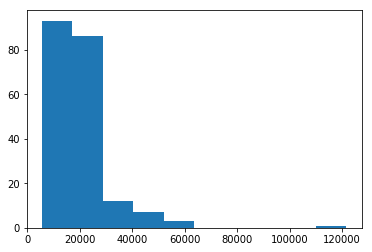

In [10]:
import matplotlib.pyplot as plt
plt.hist(datac.lens)
plt.show()

In [11]:
datac = datac[datac.lens < 100000]
maxlenc = max(datac.lens)

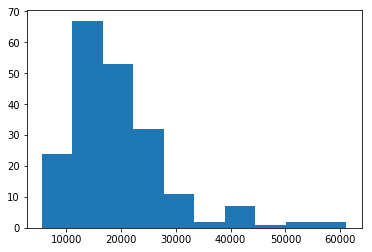

In [12]:
import matplotlib.pyplot as plt
plt.hist(datac.lens)
plt.show()

# Labels Dist

0. ABDOMINAL--------- 38.50
1. ADVANCED-CAD------ 62.50
2. ALCOHOL-ABUSE-----  3.50
3. ASP-FOR-MI-------- 81.00
4. CREATININE-------- 41.00
5. DIETSUPP-2MOS----- 52.50
6. DRUG-ABUSE--------  6.00
7. ENGLISH----------- 96.00
8. HBA1C------------- 33.50
9. KETO-1YR----------  0.50
10. MAJOR-DIABETES---- 56.50
11. MAKES-DECISIONS--- 97.00
12. MI-6MOS-----------  9.00


### picking the label with almost 50/50 dist

In [13]:
data['diet']=data.label.map(lambda x: x[5])

### Creating Train data

In [14]:
#data=data.sample(frac=0.05)
train=data.sample(frac=0.8,random_state=200)
test=data.drop(train.index)

train.shape, test.shape

((162, 6), (40, 6))

In [15]:
#datac=datac.sample(frac=0.05)
trainc=datac.sample(frac=0.8,random_state=200)
testc=datac.drop(trainc.index)

trainc.shape, testc.shape

((161, 7), (40, 7))

In [58]:
X_train = sequence.pad_sequences(train.ind, maxlen=maxlen)
X_train = np.array([x.ravel() for x in X_train])

In [59]:
y_train = np.array([x for x in train.diet])
y_train.shape

(8,)

In [60]:
X_trainc = sequence.pad_sequences(trainc.ind, maxlen=maxlenc)
X_trainc = np.array([x.ravel() for x in X_trainc])

In [61]:
y_trainc = np.array([x for x in trainc.diet])
y_trainc.shape

(8,)

# Creating NN Model - VNA

In [62]:
import numpy
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing import sequence
import numpy as np
import random

model = Sequential()
model.add(Embedding(len(vocab), maxlen, input_length=X_train.shape[1]))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 3293, 3293)        31039818  
_________________________________________________________________
dense_7 (Dense)              (None, 3293, 100)         329400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 3293, 100)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 31,449,719
Trainable params: 31,449,719
Non-trainable params: 0
_________________________________________________________________
None


# Training the Model - VNA

In [37]:
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/2
8/8 [==============================] - 23s 3s/step - loss: 0.6662 - acc: 0.6250
Epoch 2/2
8/8 [==============================] - 5s 563ms/step - loss: 1.6489 - acc: 0.6250


In [38]:
from keras.models import load_model

model.save('model-vna.h5')

# Creating and Training NN Model - Clamp

In [63]:
modelc = Sequential()
modelc.add(Embedding(len(vocabc), maxlenc, input_length=X_trainc.shape[1]))
modelc.add(Dense(100, activation='sigmoid'))
modelc.add(Dropout(0.5))
modelc.add(LSTM(100))
modelc.add(Dense(1, activation='sigmoid'))
modelc.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(modelc.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 61133, 61133)      573733205 
_________________________________________________________________
dense_9 (Dense)              (None, 61133, 100)        6113400   
_________________________________________________________________
dropout_5 (Dropout)          (None, 61133, 100)        0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 579,927,106
Trainable params: 579,927,106
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
modelc.fit(X_trainc, y_trainc, batch_size=128, epochs=10)

C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py:90: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 573733205 elements. This may consume a large amount of memory.
  "This may consume a large amount of memory." % num_elements)


Epoch 1/2


ResourceExhaustedError: OOM when allocating tensor with shape[8,61133,61133]
	 [[Node: embedding_5/Gather = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](embedding_5/embeddings/read, embedding_5/Cast)]]

Caused by op 'embedding_5/Gather', defined at:
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\rezvanjoshaghani\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-4b2e79ca6adc>", line 2, in <module>
    modelc.add(Embedding(len(vocabc), maxlenc, input_length=X_trainc.shape[1]))
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\keras\models.py", line 464, in add
    layer(x)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\keras\engine\topology.py", line 603, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\keras\layers\embeddings.py", line 134, in call
    out = K.gather(self.embeddings, inputs)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py", line 1188, in gather
    return tf.gather(reference, indices)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1179, in gather
    validate_indices=validate_indices, name=name)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\rezvanjoshaghani\Anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[8,61133,61133]
	 [[Node: embedding_5/Gather = Gather[Tindices=DT_INT32, Tparams=DT_FLOAT, validate_indices=true, _device="/job:localhost/replica:0/task:0/cpu:0"](embedding_5/embeddings/read, embedding_5/Cast)]]


In [ ]:
modelc.save('model-clamp.h5')